# Otto Kailing -- Vital Sign Data Sonification

## Setup

In [3]:
# Authors : Otto Kailing; Gian C. Rodríguez
# Based on work by : José Constantino Sánchez Curet

# Install the necessary things before importing
!pip install saxpy
!pip install playsound
!pip install simpleaudio
!pip install -U pyo

# Importing libraries and required packages
import numpy as np

from saxpy.znorm import znorm              # to normalize the time series
from saxpy.paa import paa                  # PAA
from saxpy.sax import ts_to_string         # to convert the time series to string
from saxpy.alphabet import cuts_for_asize  # alphabet size
# from saxpy.sax import sax_via_window       # for smaller SAX words -- not currently used

from pyo import *                              # actually can synthesize sound !!!!!!!!!
import time

import matplotlib.pyplot as plt

import simpleaudio as sa                # basic sound playing package

import csv                 # to be able to import .csv (and our .dat) files
import pandas as pd        # for the readcsv function, to read in data

Requirement already up-to-date: pyo in /Users/reverie/opt/anaconda3/lib/python3.8/site-packages (1.0.3)

WxPython is not found for the current python version.
Pyo will use a minimal GUI toolkit written with Tkinter (if available).
This toolkit has limited functionnalities and is no more
maintained or updated. If you want to use all of pyo's
GUI features, you should install WxPython, available here:
http://www.wxpython.org/



## Working with two files at once

In [4]:
# We are working with Otto's patients,working on heart rates.
HR = pd.read_csv("data/HR_01.dat", header = None)
HR1 = pd.read_csv("data/HR_30.dat", header = None)

# Convert both to array of floats
HR = HR[0]
HR1 = HR1[0]

# Verify that they're both the same length
print("Length of HR file  =", len(HR), "\nLength of HR1 file =", len(HR1))

Length of HR file  = 3865 
Length of HR1 file = 20698


In [5]:
# Create backup of raw data
# !!!!!!!!!!!!! RERUNNING THIS CELL WILL DELETE THE BACKUP !!!!!!!!!!!!!
HR_raw = HR
HR1_raw = HR1

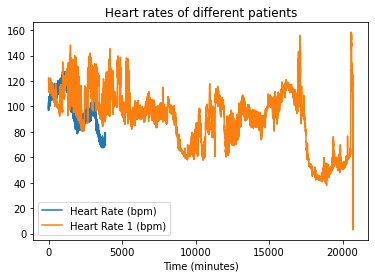

In [6]:
# Plot both raw files on the same plot
plt.plot(HR_raw, label = "Heart Rate (bpm)")
plt.plot(HR1_raw, label = "Heart Rate 1 (bpm)")
plt.title("Heart rates of different patients")
plt.xlabel("Time (minutes)")
plt.legend()
plt.show()

In [7]:
# Normalize the data
HR = znorm(HR)
HR1 = znorm(HR1)

# Define PAA size (divide by 80 is what Otto used in the summer 2020 project)
#  * We want same PAA size for both files, so they end up the same length too
#  * len(HR_raw) because this will not change. In contrast, the objects
#    "HR" and "MAP" are being reassigned at every step.
paa_size = int(len(HR_raw) / 80)
print("PAA size =", paa_size)

if (paa_size != 0):
    # Apply PAA to both files
    HR = paa(HR, paa_size)
    HR1 = paa(HR1, paa_size)
    # NOTE: this should not cause any problems with rerunning. Asking to run a PAA
    # of the post-PAA data with the same size should just regenerate the same data.
    
    # Verify that they're both the same length
    print("\nPost PAA:\nLength of HR  =", len(HR), "\nLength of HR1 =", len(HR1))
else:
    print("Error: PAA size is 0; cannot divide by 0")


PAA size = 48

Post PAA:
Length of HR  = 48 
Length of HR1 = 48


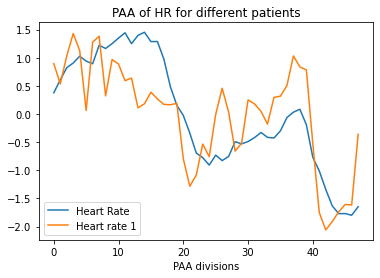

In [9]:
# Plot the files post PAA adjustment.
plt.plot(HR, label = "Heart Rate")
plt.plot(HR1, label = "Heart rate 1")
plt.title("PAA of HR for different patients")
plt.xlabel("PAA divisions")
plt.legend()
plt.show()

### Making SAX strings

In [10]:
# Define SAX alphabet size
asize = 8

# Create SAX strings of the two objects
HR_SAX = ts_to_string(HR, cuts_for_asize(asize))
HR1_SAX = ts_to_string(HR1, cuts_for_asize(asize))

# Prints the SAX strings
print("HR SAX: ", HR_SAX, "\nHR1 SAX:", HR1_SAX)

HR SAX:  ffggggghhhhhhhhhhgfedcbbbbbbcccccccddeedbbaaaaaa 
HR1 SAX: gfghgehhfggffeefeeeebabcbdfecceeedeefgggcaaaaaac


## Testing newly duplicated files

In the interest of comparing to the "isHypo.m" file, where the patients are numbered 1–58 to categorize them, I renamed the files in Finder. I will however execute 

# Code to see if we can hear a difference in patients

Patients will be chosed randomly. This code will provide  us with the sound of each patient in harmony.

In [29]:
#Server for pyo
s = Server().boot()
#HR_sound would be our default for our first "Heart rate file" comparison, HR1_sound would be the second heart rate.
HR_sound = Sine(mul = 0.1).out()


#HR1_sound code is more complex, i want to add a phaser effect to test pyo's fx library.

HR1_sound = SineLoop(freq=[random.uniform(190,210) for i in range(50)],
                     mul=0.01)
lfo = Sine(.25).range(200, 400)
phs = Phaser(HR1_sound.mix(), freq=lfo, q=10).out()



Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


Now we try our first test on two different heart rates at the same time.

In [61]:
# Loops paa_size times, using an integer as index.
print("HR\tHR1")

# Starts the pyo sound player
s.start()

for x in range(0, paa_size):
    # Prints the SAX letter for both strings.
    print(HR_SAX[x], "\t", HR1_SAX[x])
    
    # Determine the correct note for HR_sound to play.
    if HR1_SAX[x] == "a":
        HR1_sound.setFreq(220) # A3
    elif HR1_SAX[x] == "b":
        HR1_sound.setFreq(246.94) # B3
    elif HR1_SAX[x] == "c":
        HR1_sound.setFreq(277.18) # C#4
    elif HR1_SAX[x] == "d":
        HR_sound.setFreq(293.66) # D4
    elif HR1_SAX[x] == "e":
        HR_sound.setFreq(329.63) # E4
    elif HR1_SAX[x] == "f":
        HR_sound.setFreq(369.99) # F#4
    elif HR1_SAX[x] == "g":
        HR_sound.setFreq(415.30) # G#4
    else: # "h"
        HR_sound.setFreq(440) # A4
    
    # Determine the correct note for MAP_sound to play.
    if HR_SAX[x] == "a":
        HR_sound.setFreq(440) # A4
    elif HR_SAX[x] == "b":
        HR_sound.setFreq(493.88) # B4
    elif HR_SAX[x] == "c":
        HR_sound.setFreq(554.37) # C#5
    elif HR_SAX[x] == "d":
        HR_sound.setFreq(587.33) # D5
    elif HR_SAX[x] == "e":
        HR_sound.setFreq(659.25) # E5
    elif HR_SAX[x] == "f":
        HR_sound.setFreq(739.99) # F#5
    elif HR_SAX[x] == "g":
        HR_sound.setFreq(830.61) # G#5
    else: # "h"
        HR_sound.setFreq(880) # A5
    
    # Play HR_sound and MAP_sound at the same time.
    time.sleep(0.5) #half a second

# Stops the pyo sound player
s.stop()

HR	HR1
g 	 g
g 	 g
h 	 h
h 	 h
h 	 h
g 	 g
h 	 h
h 	 h
h 	 h
f 	 f
b 	 b
a 	 a
a 	 a
a 	 a
a 	 a
a 	 a
a 	 a
a 	 a
a 	 a
a 	 a
a 	 a
a 	 a
a 	 a
a 	 a
a 	 a
a 	 a
a 	 a
a 	 a
b 	 b
b 	 b
b 	 b
a 	 a
b 	 b
b 	 b
b 	 b
b 	 b
b 	 b
b 	 b
b 	 b
a 	 a
a 	 a
c 	 c
b 	 b
b 	 b
d 	 d
e 	 e
d 	 d
e 	 e
e 	 e
e 	 e
e 	 e
e 	 e
f 	 f
d 	 d
c 	 c
d 	 d
d 	 d
e 	 e
f 	 f
c 	 c
c 	 c
c 	 c
d 	 d
e 	 e
f 	 f
f 	 f
e 	 e
e 	 e
e 	 e
f 	 f
f 	 f
f 	 f
e 	 e
e 	 e
d 	 d
c 	 c
c 	 c
e 	 e
e 	 e
g 	 g
g 	 g
e 	 e
d 	 d
f 	 f
g 	 g
h 	 h
f 	 f
e 	 e
e 	 e
e 	 e
d 	 d
c 	 c
d 	 d
d 	 d
d 	 d
e 	 e
d 	 d
g 	 g
g 	 g
g 	 g
g 	 g
g 	 g
h 	 h
h 	 h
h 	 h
h 	 h
h 	 h
g 	 g
g 	 g
h 	 h
h 	 h
g 	 g
g 	 g
g 	 g
h 	 h
h 	 h
g 	 g
c 	 c
c 	 c
e 	 e
e 	 e
f 	 f
e 	 e


## Comparing different patients

The [PhysioNet contest](https://physionet.org/content/challenge-2009/1.0.0/) from which these data are taken (the "training" dataset) involved, as the title would suggest, "Predicting Acute Hypotensive Episodes." As such, the training data includes patients with and without periods of acute hypotension, as well as those who experienced hypotension before or after the data were collected. There are a wide variety of data. Hopefully we can see -- <em> and hear</em> -- as much.

### Code for producing sound in both HR-MAP on two patients.

Next lines of code should read both patients HR-MAP at the same time. Hope this works...

In [35]:
# We are working with Otto's patients,working on HR and MAP.

# Patient one
HR = pd.read_csv("data/HR_05.dat", header = None)
MAP = pd.read_csv("data/MAP_05.dat", header = None)

HR1 = pd.read_csv("data/HR_40.dat", header = None)
MAP1 = pd.read_csv("data/MAP_40.dat", header = None)



# Convert both to array of floats
HR = HR[0]
MAP = MAP[0]
HR1 = HR1[0]
MAP1 = MAP1[0]

# Verify that they're both the same length
print("Length of HR file  =", len(HR), "\nLength of MAP file =", len(MAP),
      "\nLength of HR1 file  =", len(HR1), "\nLength of MAP1 file =", len(MAP1))
     

Length of HR file  = 9853 
Length of MAP file = 9853 
Length of HR1 file  = 3658 
Length of MAP1 file = 3658


### Backup of the raw data

In [46]:
# # Commented out for not interrupting the demo
HR_raw = HR
MAP_raw = MAP
HR1_raw = HR1
MAP1_raw = MAP1

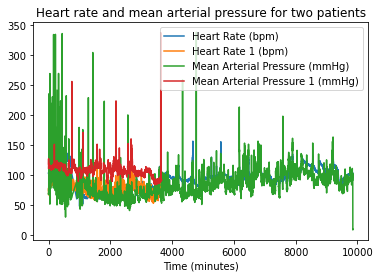

In [49]:
# Plot both raw files on the same plot
# Second Patient is one
plt.plot(HR_raw, label = "Heart Rate (bpm)")
plt.plot(HR1_raw, label = "Heart Rate 1 (bpm)")
plt.plot(MAP_raw, label = "Mean Arterial Pressure (mmHg)")
plt.plot(MAP1_raw, label = "Mean Arterial Pressure 1 (mmHg)")
plt.title("Heart rate and mean arterial pressure for two patients")
plt.xlabel("Time (minutes)")
plt.legend()
plt.show()



## Nromalize the data

We are working with two patients data to normalize.

In [52]:
# Normalize the data
HR = znorm(HR)
MAP = znorm(MAP)
HR1 = znorm(HR)
MAP1 = znorm(MAP1)

# Define PAA size (divide by 80 is what Otto used in the summer 2020 project)
#  * We want same PAA size for both files, so they end up the same length too
#  * len(HR_raw) because this will not change. In contrast, the objects
#    "HR" and "MAP" are being reassigned at every step.
paa_size = int(len(HR_raw) / 80)
print("PAA size =", paa_size)

paa_size1 = int(len(HR1_raw)/80)
print("PAA size =", paa_size)

if (paa_size, paa_size1 != 0):
    # Apply PAA to both files
    HR = paa(HR, paa_size)
    MAP = paa(MAP, paa_size)
    HR1 = paa(HR1, paa_size)
    MAP1 = paa(MAP1, paa_size)
    
    # Verify that they're both the same length
    print("\nPost PAA:\nLength of HR  =", len(HR), "\nLength of HR1 =", len(HR1),
          "\nLength of MAP =", len(MAP), "\nLength of MAP1 =", len(MAP1))
else:
    print("Error: PAA size is 0; cannot divide by 0")

PAA size = 123
PAA size = 123

Post PAA:
Length of HR  = 123 
Length of HR1 = 123 
Length of MAP = 123 
Length of MAP1 = 123


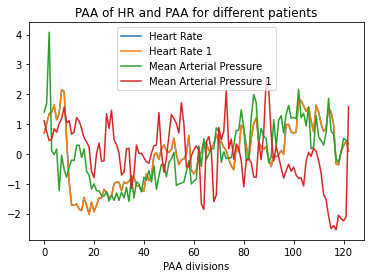

In [54]:
# Plot the files post PAA adjustment.
plt.plot(HR, label = "Heart Rate")
plt.plot(HR1, label = "Heart Rate 1")
plt.plot(MAP, label = "Mean Arterial Pressure")
plt.plot(MAP1, label = "Mean Arterial Pressure 1")
plt.title("PAA of HR and PAA for different patients")
plt.xlabel("PAA divisions")
plt.legend()
plt.show()

In [55]:
# Define SAX alphabet size
asize = 8

# Create SAX strings of the two objects
HR_SAX = ts_to_string(HR, cuts_for_asize(asize))
MAP_SAX = ts_to_string(MAP, cuts_for_asize(asize))
HR1_SAX = ts_to_string(HR1, cuts_for_asize(asize))
MAP1_SAX = ts_to_string(MAP1, cuts_for_asize(asize))

# Prints the SAX strings
print("HR SAX: ", HR_SAX, "\nMAP SAX:", MAP_SAX, 
      "\nHR1 SAX: ", HR1_SAX, "\nMAP1:", MAP1_SAX)

HR SAX:  gghhhghhhfbaaaaaaaaaaaaaaaaabbbabbbbbbbaacbbdedeeeeefdcddefcccdeffeeefffeedcceeggedfghfeeedcdddedggggghhhhhgghhggghhgcceefe 
MAP SAX: hhhedeadcbcddeedecbabaaaaaaaaaaaabababbabbcbcabccbddebbbbcdbbbecfddeeggdedddegghgddhhhfgffddgeghghhhhhhhhgheehffeghggddefff 
HR1 SAX:  gghhhghhhfbaaaaaaaaaaaaaaaaabbbabbbbbbbaacbbdedeeeeefdcddefcccdeffeeefffeedcceeggedfghfeeedcdddedggggghhhhhgghhggghhgcceefe 
MAP1: ggffggghhggfghggffecbefddhghfeebceeaceeedddeeehecdfhhgghgccdeeeaaffeaagfghefdfedbdddbbfdghhfdedcbccccbbbbdedeedcaaaaaaaaaah


## Code for testing both patients at the same time.

In [59]:
#Server for pyo
s = Server().boot()
#HR_sound would be our default for our first "Heart rate file" comparison, HR1_sound would be the second heart rate.
HR_sound = Sine(mul = 0.1).out()
MAP_sound = Sine(mul = 0.1).out()

#HR1_sound code is more complex, i want to add a phaser effect to test pyo's fx library.

HR1_sound = Sine(mul = 0.1).out()

MAP1_sound = Sine(mul = 0.1).out()

Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


In [60]:
# Loops paa_size times, using an integer as index.
print("HR\tMAP\tHR1\tMAP1")

# Starts the pyo sound player
s.start()

for x in range(0, paa_size):
    # Prints the SAX letter for both strings.
    print(HR_SAX[x], "\t", MAP_SAX[x],"\t", HR1_SAX[x], "\t", MAP1_SAX)
    
    # Determine the correct note for HR_sound to play.
    if HR_SAX[x] == "a":
        HR_sound.setFreq(220) # A3
    elif HR_SAX[x] == "b":
        HR_sound.setFreq(246.94) # B3
    elif HR_SAX[x] == "c":
        HR_sound.setFreq(277.18) # C#4
    elif HR_SAX[x] == "d":
        HR_sound.setFreq(293.66) # D4
    elif HR_SAX[x] == "e":
        HR_sound.setFreq(329.63) # E4
    elif HR_SAX[x] == "f":
        HR_sound.setFreq(369.99) # F#4
    elif HR_SAX[x] == "g":
        HR_sound.setFreq(415.30) # G#4
    else: # "h"
        HR_sound.setFreq(440) # A4
    
    # Determine the correct note for MAP_sound to play.
    if MAP_SAX[x] == "a":
        MAP_sound.setFreq(440) # A4
    elif MAP_SAX[x] == "b":
        MAP_sound.setFreq(493.88) # B4
    elif MAP_SAX[x] == "c":
        MAP_sound.setFreq(554.37) # C#5
    elif MAP_SAX[x] == "d":
        MAP_sound.setFreq(587.33) # D5
    elif MAP_SAX[x] == "e":
        MAP_sound.setFreq(659.25) # E5
    elif MAP_SAX[x] == "f":
        MAP_sound.setFreq(739.99) # F#5
    elif MAP_SAX[x] == "g":
        MAP_sound.setFreq(830.61) # G#5
    else: # "h"
        MAP_sound.setFreq(880) # A5
    
    # Determine the correct note for HR1_sound to play
    if HR1_SAX[x] == "a":
        HR1_sound.setFreq(220) # A3
    elif HR1_SAX[x] == "b":
        HR1_sound.setFreq(246.94) # B3
    elif HR1_SAX[x] == "c":
        HR1_sound.setFreq(277.18) # C#4
    elif HR1_SAX[x] == "d":
        HR1_sound.setFreq(293.66) # D4
    elif HR1_SAX[x] == "e":
        HR1_sound.setFreq(329.63) # E4
    elif HR1_SAX[x] == "f":
        HR1_sound.setFreq(369.99) # F#4
    elif HR1_SAX[x] == "g":
        HR1_sound.setFreq(415.30) # G#4
    else: # "h"
        HR1_sound.setFreq(440) # A4
        
    # Determine the correct note for MAP1_sound to play
    if MAP1_SAX[x] == "a":
        MAP1_sound.setFreq(440) # A4
    elif MAP1_SAX[x] == "b":
        MAP1_sound.setFreq(493.88) # B4
    elif MAP1_SAX[x] == "c":
        MAP1_sound.setFreq(554.37) # C#5
    elif MAP1_SAX[x] == "d":
        MAP1_sound.setFreq(587.33) # D5
    elif MAP1_SAX[x] == "e":
        MAP1_sound.setFreq(659.25) # E5
    elif MAP1_SAX[x] == "f":
        MAP1_sound.setFreq(739.99) # F#5
    elif MAP1_SAX[x] == "g":
        MAP1_sound.setFreq(830.61) # G#5
    else: # "h"
        MAP1_sound.setFreq(880) # A5
    
    # Play HR_sound and MAP_sound at the same time.
    time.sleep(0.5) #half a second

# Stops the pyo sound player
s.stop()

HR	MAP	HR1	MAP1
g 	 h 	 g 	 ggffggghhggfghggffecbefddhghfeebceeaceeedddeeehecdfhhgghgccdeeeaaffeaagfghefdfedbdddbbfdghhfdedcbccccbbbbdedeedcaaaaaaaaaah
g 	 h 	 g 	 ggffggghhggfghggffecbefddhghfeebceeaceeedddeeehecdfhhgghgccdeeeaaffeaagfghefdfedbdddbbfdghhfdedcbccccbbbbdedeedcaaaaaaaaaah
h 	 h 	 h 	 ggffggghhggfghggffecbefddhghfeebceeaceeedddeeehecdfhhgghgccdeeeaaffeaagfghefdfedbdddbbfdghhfdedcbccccbbbbdedeedcaaaaaaaaaah
h 	 e 	 h 	 ggffggghhggfghggffecbefddhghfeebceeaceeedddeeehecdfhhgghgccdeeeaaffeaagfghefdfedbdddbbfdghhfdedcbccccbbbbdedeedcaaaaaaaaaah
h 	 d 	 h 	 ggffggghhggfghggffecbefddhghfeebceeaceeedddeeehecdfhhgghgccdeeeaaffeaagfghefdfedbdddbbfdghhfdedcbccccbbbbdedeedcaaaaaaaaaah
g 	 e 	 g 	 ggffggghhggfghggffecbefddhghfeebceeaceeedddeeehecdfhhgghgccdeeeaaffeaagfghefdfedbdddbbfdghhfdedcbccccbbbbdedeedcaaaaaaaaaah
h 	 a 	 h 	 ggffggghhggfghggffecbefddhghfeebceeaceeedddeeehecdfhhgghgccdeeeaaffeaagfghefdfedbdddbbfdghhfdedcbccccbbbbdedeedcaaaaaaaaaah
h 	 d 	 h 	 ggffggghhggfghggffec

c 	 b 	 c 	 ggffggghhggfghggffecbefddhghfeebceeaceeedddeeehecdfhhgghgccdeeeaaffeaagfghefdfedbdddbbfdghhfdedcbccccbbbbdedeedcaaaaaaaaaah
d 	 e 	 d 	 ggffggghhggfghggffecbefddhghfeebceeaceeedddeeehecdfhhgghgccdeeeaaffeaagfghefdfedbdddbbfdghhfdedcbccccbbbbdedeedcaaaaaaaaaah
e 	 c 	 e 	 ggffggghhggfghggffecbefddhghfeebceeaceeedddeeehecdfhhgghgccdeeeaaffeaagfghefdfedbdddbbfdghhfdedcbccccbbbbdedeedcaaaaaaaaaah
f 	 f 	 f 	 ggffggghhggfghggffecbefddhghfeebceeaceeedddeeehecdfhhgghgccdeeeaaffeaagfghefdfedbdddbbfdghhfdedcbccccbbbbdedeedcaaaaaaaaaah
f 	 d 	 f 	 ggffggghhggfghggffecbefddhghfeebceeaceeedddeeehecdfhhgghgccdeeeaaffeaagfghefdfedbdddbbfdghhfdedcbccccbbbbdedeedcaaaaaaaaaah
e 	 d 	 e 	 ggffggghhggfghggffecbefddhghfeebceeaceeedddeeehecdfhhgghgccdeeeaaffeaagfghefdfedbdddbbfdghhfdedcbccccbbbbdedeedcaaaaaaaaaah
e 	 e 	 e 	 ggffggghhggfghggffecbefddhghfeebceeaceeedddeeehecdfhhgghgccdeeeaaffeaagfghefdfedbdddbbfdghhfdedcbccccbbbbdedeedcaaaaaaaaaah
e 	 e 	 e 	 ggffggghhggfghggffecbefddhghfeebceea

e 	 f 	 e 	 ggffggghhggfghggffecbefddhghfeebceeaceeedddeeehecdfhhgghgccdeeeaaffeaagfghefdfedbdddbbfdghhfdedcbccccbbbbdedeedcaaaaaaaaaah
